#### Analyzing Neural Time Series Data
Python code for Chapter 25 -- converted from original Matlab by AE Studio (and ChatGPT)\
Original Matlab code by Mike X Cohen

This code accompanies the book, titled "Analyzing Neural Time Series Data" (MIT Press).\
Using the code without following the book may lead to confusion, incorrect data analyses, and misinterpretations of results.\
Mike X Cohen and AE Studio assume no responsibility for inappropriate or incorrect use of this code.

In [19]:
# Import necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft, ifft
from scipy.stats import pearsonr

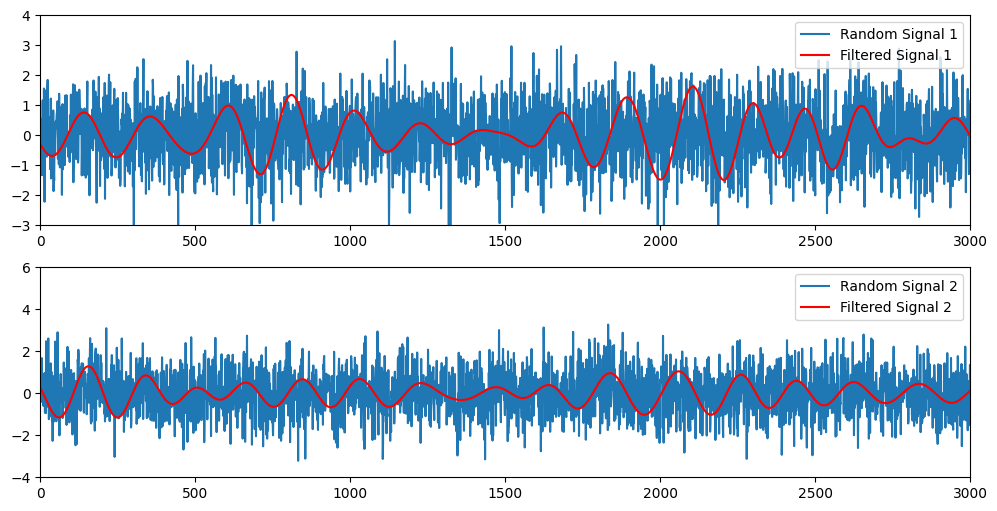

In [20]:
# Setup for figure 25.3

# generate a random signal of 3 seconds
srate = 1000

randsig1 = np.random.randn(3*srate) # 3 seconds, with this sampling rate
randsig2 = np.random.randn(3*srate)

# now filter at 5 Hz
f = 5 # frequency of wavelet in Hz
time = np.arange(-1, 1+1/srate, 1/srate) # time for wavelet, from -1 to 1 second in steps of 1/sampling-rate
s = 6/(2*np.pi*f) # width of Gaussian
wavelet = np.exp(2*np.pi*1j*f*time) * np.exp(-time**2/(2*s**2))

# FFT parameters
n_wavelet = len(wavelet)
n_data = len(randsig1)
n_convolution = n_wavelet + n_data - 1
half_of_wavelet_size = (len(wavelet) - 1) // 2

# FFT of wavelet and EEG data
convolution_result_fft = ifft(fft(wavelet, n_convolution) * fft(randsig1, n_convolution), n_convolution) * np.sqrt(s)/10
filtsig1 = np.real(convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size])
anglesig1 = np.angle(convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size])

convolution_result_fft = ifft(fft(wavelet, n_convolution) * fft(randsig2, n_convolution), n_convolution) * np.sqrt(s)/10
filtsig2 = np.real(convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size])
anglesig2 = np.angle(convolution_result_fft[half_of_wavelet_size:-half_of_wavelet_size])

# Plot the random signals and their filtered versions
plt.figure(figsize=(12, 6))

for i in range(2):
    plt.subplot(2, 1, i+1)
    if i == 0:
        plt.plot(randsig1, label='Random Signal 1')
        plt.plot(filtsig1, 'r', label='Filtered Signal 1')
        plt.xlim([0, 3000])
        plt.ylim([-3, 4])
    else:
        plt.plot(randsig2, label='Random Signal 2')
        plt.plot(filtsig2, 'r', label='Filtered Signal 2')
        plt.xlim([0, 3000])
        plt.ylim([-4, 6])
    plt.legend()

plt.show()

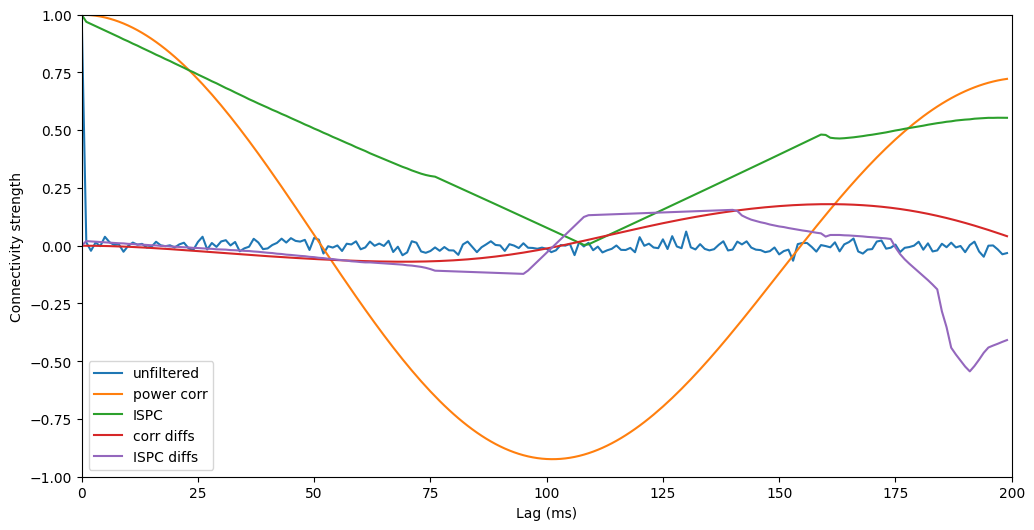

In [21]:
# Figure 25.3

# initialize output correlation matrix
correlations = np.zeros((5, round(1000/f)))

for i in range(round(1000/f)):
    
    # correlation of unfiltered random signal
    temp, _ = pearsonr(randsig1[:-i or None], randsig1[i:])
    correlations[0, i] = temp
    
    # correlation of filtered signal
    temp, _ = pearsonr(filtsig1[:-i or None], filtsig1[i:])
    correlations[1, i] = temp
    
    # phase clustering
    phase_diff1 = np.angle(anglesig1[:-i or None] - anglesig1[i:])
    correlations[2, i] = np.abs(np.mean(np.exp(1j*phase_diff1)))
    
    # difference of correlations of filtered signal
    temp, _ = pearsonr(filtsig2[:-i or None], filtsig2[i:])
    correlations[3, i] = temp - correlations[1, i]
    
    # difference of phase clusterings
    phase_diff2 = np.angle(anglesig2[:-i or None] - anglesig2[i:])
    correlations[4, i] = np.abs(np.mean(np.exp(1j*phase_diff2))) - correlations[2, i]

# Plot the correlations
plt.figure(figsize=(12, 6))
plt.plot(correlations.T)
plt.xlim([0, 200])
plt.ylim([-1, 1])
plt.xlabel('Lag (ms)')
plt.ylabel('Connectivity strength')
plt.legend(['unfiltered', 'power corr', 'ISPC', 'corr diffs', 'ISPC diffs'])
plt.show()